<a href="https://colab.research.google.com/github/vantainguyen/Data_analytics/blob/main/Lab_Week_1_Exploration_Wednesday_Text_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Lab 1.2
## Data Exploration of Text Data

The dataset describes railroad incidents in the USA for 2019 - data source: https://safetydata.fra.dot.gov/OfficeofSafety/publicsite/on_the_fly_download.aspx

Those incidents are of different nature - they describe derailment, whether a train got struck, and other incidents that caused damages and potential hazardous materials to be released. Because we are only interested in the incident text, we deleted most columns in the dataset and only left Railroad, State, Station, County and Narrative (incident text).

Let's load all the required packages to run the script

In [47]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#### Reading in the Data using Pandas

Pandas is a Python library for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

## Reading in the Data in Google Colab
Under Colab logo on the top-left, click on 'files' (folder icon). Right-click on the subfolder named 'content' and upload your CSV file. You'll be repeating this step every time your Colab needs to reconnect to a server.

In [51]:
raw_data_df_ = pd.read_csv("rail_incident_data_USA.csv")

In [52]:
#summary stats of the dataset
raw_data_df_.describe().T

,count,mean,std,min,25%,50%,75%,max
IYR,2685.0,19.000000,0.000000,19.0,19.0,19.0,19.0,19.0
IMO,2685.0,6.320298,3.468001,1.0,3.0,6.0,9.0,12.0
STATE,2685.0,28.357169,15.457654,1.0,17.0,28.0,42.0,56.0


In [53]:
raw_data_df_.head()

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR1,NARR2,NARR3,NARR4,...,NARR6,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...,HE OCCUPANT OF THE VEHICLE WAS A CONFIRMED FAT...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE...",E IMPACT WITH ONE ANOTHER.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,G ACROSS THE TRACKS WITH HIS BIKE FROM THE WES...,LOCOMOTIVE ENGINEER SOUNDED HORN AND BELL TO W...,ASSER WAS STRUCK RESULTING IN A FATALITY. BLF...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,MOTIVE ENGINEER SOUNDED HORN AND BELL AND PLAC...,NGERS IN VEHICLE WERE TRANSPORTED TO LOCAL HOS...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ok - we encounter our first problem. The rail incidents are divided into many separate columns. We want the text to be in one column only and therefore need to merge those 15 columns into one

#### Removing Duplicates

Before we merge the NARR columns, let's check whether there are any duplicates in the data and get rid of them. Pandas has an in-built duplicated() method which we can use for that

In [54]:
#creating a new column in the dataframe that stores a boolean value whether that row is a duplicate or not
raw_data_df_['dup'] = raw_data_df_.duplicated(subset=None, keep='first')

In [55]:
#checking how many duplicates there were by counting the True and False values in that column
raw_data_df_['dup'].value_counts()

False    2401
True      284
Name: dup, dtype: int64

In [56]:
raw_data_df_

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR1,NARR2,NARR3,NARR4,...,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,dup
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...,HE OCCUPANT OF THE VEHICLE WAS A CONFIRMED FAT...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE...",E IMPACT WITH ONE ANOTHER.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,G ACROSS THE TRACKS WITH HIS BIKE FROM THE WES...,LOCOMOTIVE ENGINEER SOUNDED HORN AND BELL TO W...,ASSER WAS STRUCK RESULTING IN A FATALITY. BLF...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,MOTIVE ENGINEER SOUNDED HORN AND BELL AND PLAC...,NGERS IN VEHICLE WERE TRANSPORTED TO LOCAL HOS...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680,19,2,NCTC,6,OCEANSIDE,SAN DIEGO,METROLINK 858 DERAILED AT STUART MESA YARD.,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2681,19,1,MET,6,MODESTO,STANISLAUS,"ON THE MORNING OF JANUARY 15, 2019, CONDUCTOR ...","SINGLE CAR, CONDUCTOR FAILED TO PROPERLY SECUR...",ROLLING BACK INTO THE FOUL WHILE SHOVING INTO ...,SINGLE CAR THAT ROLLED BACK INTO THE FOUL CAUS...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2682,19,7,BNSF,6,BAKERSFIELD,KERN,EMPLOYEE STOPPED AND LINED THE DERAIL TO THE W...,OTIVE TO DERAIL DUE TO FAILURE TO APPLY OR REM...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2683,19,12,UP,6,BLOOMINGTON,SAN BERNARDINO,LOQ25-26 WAS MAKING A SHOVING MOVE WITH LIGHT ...,HE POINT. THE CONDUCTOR THOUGHT THAT THE YELL...,"SWITCH LINED FOR 308, WHEN IN FACT IT A WAS A ...",HE NOTICED THEY WERE ACTUALLY LINED FOR CROSSO...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
#raw_data_df_.describe()

There are quite a few duplicates. About 10% of the dataset are duplicates. Let's delete them

In [57]:
# let's write the data into a new dataframe, only keeping the lines where the value for "dup" is False
raw_data_df = raw_data_df_[raw_data_df_['dup'] == False]

In [ ]:
# Instead of creating a new column with boolean values, you could also use the following to remove the duplicates
# raw_data_df_ = raw_data_df_.drop_duplicates()

In [58]:
raw_data_df.tail()

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR1,NARR2,NARR3,NARR4,...,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,dup
2679,19,2,TRC,6,TRONA,SAN BERNARDINO,RUN 2 WAS IN THE PROCESS OF PULLING THE HEAD 1...,RAKEMAN TOLD THE ENGINEER TO TAKE IT AHEAD 12 ...,"HE GOT DOWN TO 3 CARS TO GO, THE CONDUCTOR TOL...",NOT LOOKING RIGHT. THE CONDUCTOR WALKED BACK ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2680,19,2,NCTC,6,OCEANSIDE,SAN DIEGO,METROLINK 858 DERAILED AT STUART MESA YARD.,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2681,19,1,MET,6,MODESTO,STANISLAUS,"ON THE MORNING OF JANUARY 15, 2019, CONDUCTOR ...","SINGLE CAR, CONDUCTOR FAILED TO PROPERLY SECUR...",ROLLING BACK INTO THE FOUL WHILE SHOVING INTO ...,SINGLE CAR THAT ROLLED BACK INTO THE FOUL CAUS...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2682,19,7,BNSF,6,BAKERSFIELD,KERN,EMPLOYEE STOPPED AND LINED THE DERAIL TO THE W...,OTIVE TO DERAIL DUE TO FAILURE TO APPLY OR REM...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2683,19,12,UP,6,BLOOMINGTON,SAN BERNARDINO,LOQ25-26 WAS MAKING A SHOVING MOVE WITH LIGHT ...,HE POINT. THE CONDUCTOR THOUGHT THAT THE YELL...,"SWITCH LINED FOR 308, WHEN IN FACT IT A WAS A ...",HE NOTICED THEY WERE ACTUALLY LINED FOR CROSSO...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [59]:
del raw_data_df['dup'] # deleting "dup" column since we don't need it anymore

In [60]:
# Check for the null values 

raw_data_df.isna().apply(pd.value_counts) 

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR1,NARR2,NARR3,NARR4,...,NARR6,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15
False,2401.0,2401.0,2401.0,2401.0,2401.0,2401.0,2401.0,2106,1147,582,...,189,115,76,50,33,22,18,16,8,5
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295,1254,1819,...,2212,2286,2325,2351,2368,2379,2383,2385,2393,2396


We see some missing values. But, note that the missing values are in NARR columns, which we should be merging together in the next steps. Do we then remove the missing values now?

#### Merging incident text into one column

##### List slicing and lambda functions in python
Ok, a lot is going on in the function below but let's break it down
1. we are creating a new column (NARR) which will contain the whole narrative of the incident text
2. we select all columns starting from columns 7 (NARR1) until the end. That's what [6:] is going: starting from column 6 (column 0 being the first) select all the columns until the end. If we wanted to merge only NARR1 and NARR2, we would write [6:8]. In python the ending column is not included so we would select only columns 6 and 7
3. we are applying a lambda function to selected cell (x). A lambda function is a small anonymous function and comes handy when we are doing an operation only once and do not need to define a separate function for it
4. the function iterates through each cell in the row starting at position 5 and joins it with the subsequent cells as a type string. If there cell is empty we ignore it (dropna()). The reason why we are expresively defining that the cell should be of type string is because some entries might not have an incident text (all NANs) and would be picked up by python as a float type
5. the function goes through each row in the dataframe and does the merging described in 4.

In [61]:

raw_data_df['NARR'] = raw_data_df[raw_data_df.columns[6:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

In [62]:
raw_data_df.head()

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR1,NARR2,NARR3,NARR4,...,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,NARR
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...,HE OCCUPANT OF THE VEHICLE WAS A CONFIRMED FAT...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE...",E IMPACT WITH ONE ANOTHER.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE..."
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,G ACROSS THE TRACKS WITH HIS BIKE FROM THE WES...,LOCOMOTIVE ENGINEER SOUNDED HORN AND BELL TO W...,ASSER WAS STRUCK RESULTING IN A FATALITY. BLF...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...,MOTIVE ENGINEER SOUNDED HORN AND BELL AND PLAC...,NGERS IN VEHICLE WERE TRANSPORTED TO LOCAL HOS...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.


Ok, we see that it has worked - we have a new column with just NARR. But let's double check whether the function has really done what we wanted

In [65]:
raw_data_df.iloc[1,6] # NARR1 in first row 7th column

'PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECES OF EQUIPMENT, HAD 7 SEPERATE PIECES OF EQUIPMENT MAK'

In [66]:
raw_data_df.iloc[1,7] #NARR2 in first row 8th column

'E IMPACT WITH ONE ANOTHER.'

In [67]:
raw_data_df.iloc[1,21] #NARR raw_data_df.iloc[1,-1] another way of selecting last row

'PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECES OF EQUIPMENT, HAD 7 SEPERATE PIECES OF EQUIPMENT MAK E IMPACT WITH ONE ANOTHER.'

Great - it has worked! The incident text of the first two NARR columns got combined into the newly created NARR column. Now let's select only this column and the other few

In [68]:
#we want to delete columns in range 6-20
cols = list(range(6,21))

In [69]:
cols

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Why am I not just selecting the columns I need and create a new dataframe?
I could: df_new= raw_data_df[['IYR','IMO', 'STATE', 'RAILROAD', 'STATION', 'COUNTY', 'NARR]]
But imagine you have many more columns in your dataset. Doing it this way could be very tedious
However, we know the range of columns we want to delete - 6th until 19th columns, so we can define that range and tell pandas to delete that range of columns

In [70]:
raw_data_df.drop(raw_data_df.columns[cols],axis=1,inplace=True)

In [71]:
raw_data_df

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR
0,19,11,ATK,6,CASTROVILLE,MONTEREY,CAMERA-EQUIPPED TRAIN 14 STRUCK AN OCCUPIED SA...
1,19,10,MNCW,9,NORWALK,FAIRFIELD,"PRODUCTION GANG, TRAVELING NORTH WITH 22 PIECE..."
2,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 604 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...
3,19,4,FEC,12,POMPANO BEACH,BROWARD,BLF 606 WAS TRAVELING SOUTHBOUND ON EAST MAIN ...
4,19,4,CSX,12,SEVILLE,VOLUSIA,AMTRAK P09811 STRUCK SEMI AT PRIVATE CROSSING.
...,...,...,...,...,...,...,...
2679,19,2,TRC,6,TRONA,SAN BERNARDINO,RUN 2 WAS IN THE PROCESS OF PULLING THE HEAD 1...
2680,19,2,NCTC,6,OCEANSIDE,SAN DIEGO,METROLINK 858 DERAILED AT STUART MESA YARD.
2681,19,1,MET,6,MODESTO,STANISLAUS,"ON THE MORNING OF JANUARY 15, 2019, CONDUCTOR ..."
2682,19,7,BNSF,6,BAKERSFIELD,KERN,EMPLOYEE STOPPED AND LINED THE DERAIL TO THE W...


In [72]:
# Check for the null values 

raw_data_df.isna().apply(pd.value_counts) 

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR
False,2401,2401,2401,2401,2401,2401,2401


#### Data Exploration
Awesome. Finally we have our clean df and can start with our data exploration.
Let's get some feel for the data check what Railroad, state, station and county is represented the most and in what month most incidents occur. If you are interested only in the text analysis, feel free so scroll ahead

In [73]:
raw_data_df['STATION'].value_counts()

KANSAS CITY      48
NORTH PLATTE     34
CHICAGO          34
EAST ST LOUIS    32
MELROSE PARK     24
                 ..
NEWBURG           1
AUXIER            1
LOTTIE            1
HOWARD            1
BAKERSFIELD       1
Name: STATION, Length: 1030, dtype: int64

In [74]:
first_100 = raw_data_df['STATION'].value_counts()[:100]
first_100

KANSAS CITY      48
NORTH PLATTE     34
CHICAGO          34
EAST ST LOUIS    32
MELROSE PARK     24
                 ..
LORDSBURG         5
HANNIBAL          5
CHANNELVIEW       5
TACOMA            5
VANCOUVER         5
Name: STATION, Length: 100, dtype: int64

In [75]:
#mean incidents per year of 100 biggest stations (cities)
first_100.mean()

10.17

In [76]:
first_100.std()
#standard deviation

6.9849115884877095

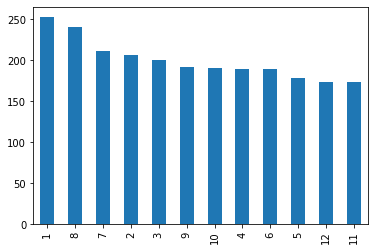

In [77]:
#months
raw_data_df['IMO'].value_counts().plot.bar()

Interesting - it seems like january and august have more incidents than the other months. 

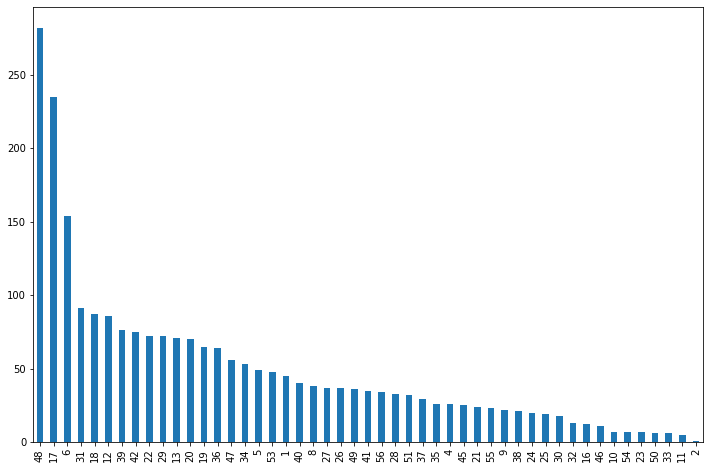

In [78]:
plt.figure(figsize=(12,8))
raw_data_df['STATE'].value_counts().plot.bar()

In [79]:
#top 5
raw_data_df['STATE'].value_counts()[:5]

48    282
17    235
6     154
31     91
18     87
Name: STATE, dtype: int64

I do not know how the states are numbered in this dataset - it does not seem to be alphabetically. Let's check it manually by County


In [80]:
raw_data_df[raw_data_df['STATE'] == 48]

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR
307,19,12,XTGS,48,ANAHUAC,CHAMBERS,BALLAST WAS FOULING THE TRACK DURING LOADING A...
308,19,1,UP,48,BEAUMONT,JEFFERSON,THE YBM05R-07 HAD A HOLD OF 65 CARS IN HUMP OP...
309,19,10,TXOR,48,SWEETWATER,NOLAN,TXOR DERAILED 15 LOADED CARS OUT OF 25 LOADED ...
310,19,10,UP,48,EL PASO,EL PASO,MHNTU-24 TRAVELING WEST DERAILED THE TRAILING ...
311,19,8,UP,48,EL PASO,EL PASO,MTUEP-11 WAS SHOVING LIGHT POWER WEST IN 835 T...
...,...,...,...,...,...,...,...
2658,19,9,XTGS,48,ANAHUAC,CHAMBERS,CREW FAILED TO VERIFY LINING OF CROSSOVER SWIT...
2659,19,3,UP,48,TOYAH,REEVES,TRAIN ISINSX-03 STRUCK A SEMI TRUCK LOADED WIT...
2660,19,9,XTGS,48,ANAHUAC,CHAMBERS,CREW WAS PULLING CARS OUT OF TRACK 888 IN G-YA...
2661,19,2,UP,48,WHITSETT,LIVE OAK,THE WVJVBR-13 STRUCK A LOADED SEMI OF FRACKING...


#### Looking at some of the states

48: Texas

17: Illinois

6: California

2: Alaska (not surprising)


In [81]:
raw_data_df['COUNTY'].value_counts()[:10]

COOK           106
JEFFERSON       65
LINCOLN         43
ST CLAIR        38
HARRIS          37
JACKSON         32
LOS ANGELES     31
TARRANT         27
WYANDOTTE       26
MARION          26
Name: COUNTY, dtype: int64

Cook County is only the second most populous county in the states after LA - but has almost 4 times as many incidents as LA. However, Illinois has more railway track (9,982 miles) compared to Californias 6863 miles

In [82]:
raw_data_df['STATION'].value_counts()[:10]

KANSAS CITY      48
NORTH PLATTE     34
CHICAGO          34
EAST ST LOUIS    32
MELROSE PARK     24
HOUSTON          22
DAYTON           22
FORT WORTH       17
NASHVILLE        17
OGDEN            15
Name: STATION, dtype: int64

Wow - Kansas City in Missouri (which does not even come up in the top 5 states with most incidents) leads the table with 48 incidents in 2019. NORTH PLATTE in Nebraska is second (#5 in our list above of top 5 states). Chicago is in Illinois (#2). Melrose Park (Illinois), East St Louis (Illinois).

In [83]:
raw_data_df['RAILROAD'].value_counts()[:5]

UP      689
BNSF    403
NS      309
CSX     204
ATK     119
Name: RAILROAD, dtype: int64

it seems like UP (Union Pacific) has the most incidents. But maybe they just have more miles than the other companies. I have googled how many track miles each company has 

UP      32,100 miles
BNSF    32,500 miles 
NS      20,000 miles
CSX     21,000 miles


In [84]:
# I am storing the number of incidents and the railroad miles in lists
railroad_incidents = [689, 403, 309, 204]
railroad_miles = [32100, 32500, 20000, 21000]

In [85]:
import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

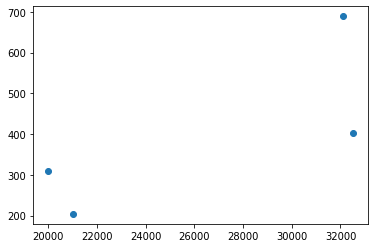

In [86]:
#lets plot number of incidents and track miles
fig, ax = plt.subplots()
ax.scatter(railroad_miles,railroad_incidents)

plt.show()


We can see that UP is clearly an outlier compared to the other 3 railroads when comparing incident number to railroad miles

#### Kansas City as example
Out of curiosity I will have a look at the incidents in kansas city and save it in a new dataframe kansas_df

In [87]:
kansas_df = raw_data_df[raw_data_df['STATION'] == "KANSAS CITY"]

In [88]:
kansas_df.head()
#dataframe that only contains incidents that happened in Kansas

,IYR,IMO,RAILROAD,STATE,STATION,COUNTY,NARR
18,19,8,KCT,20,KANSAS CITY,WYANDOTTE,CREW ON UP TRAIN MNPINP-19 USING KCT MAIN LINE...
36,19,2,UP,29,KANSAS CITY,JACKSON,THE YKC20R-25 WAS HUMPING A CUT OF 100 CARS OF...
37,19,2,KCS,29,KANSAS CITY,JACKSON,CREW FAILED TO LINE BOTH ENDS OF CROSSOVER FRO...
38,19,2,KCS,29,KANSAS CITY,JACKSON,CPRS CREW FAILED TO SECURE TRACK 9 & THEY KICK...
41,19,12,KCS,29,KANSAS CITY,JACKSON,BNSF CREW RAN THRU 126 SWITCH & THEN SHOVED BA...


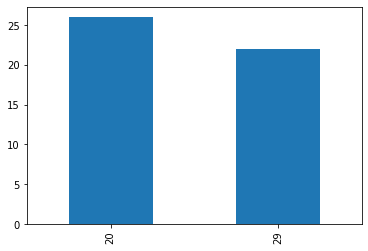

In [89]:
kansas_df['STATE'].value_counts().plot.bar()

Not sure why they divide Kansas into Kansas and Missouri if the station is the same - but it does not really matter. Given there are 49 incidents in Kansas, we see in the table with the counties with the most incidents that Jackson and Wyandotte have 58 incidents, hence only 11 outside of Kansas City. 

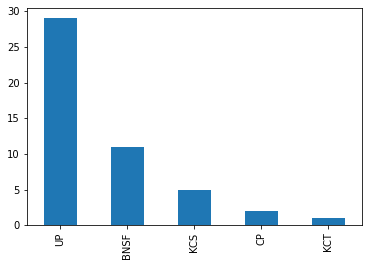

In [90]:
kansas_df['RAILROAD'].value_counts().plot.bar()

Ha - we can see that again, UP is overrepresented with incidents. accoriding to this map https://www.ksdot.org/Assets/wwwksdotorg/bureaus/burRail/Rail/publications/KansasRailroadMap2019.pdf  UP only has 300 miles more than BNSF but almost 3 times as many incidents.

It will be interesting to check the incidents texts. Let's finally dive in and check the incidents texts. First for Kansas City only. lets subdivide the kansas dataframe further into a dataframe for UP and a dataframe for the rest

In [91]:
kansas_up_df = kansas_df[kansas_df['RAILROAD'] == "UP"]

In [92]:
kansas_rr_rest_df = kansas_df[kansas_df['RAILROAD'] != "UP"]

In week 3, you will use this knowledge about data exploration of text data to find the most frequent words in a text and build Word Clouds.

#### Some Text Preprocessing

Below you see a function which I have copy pasted from one of my own projects. it's my typical go-to text preprocessing function where I delete all stopwords symbols apart from letters, convert the text into lower case and stem or lemmatise the words.

Stopwords: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). We would not want these words to take up space in our dataset, or taking up valuable processing time. Also, wenn looking for common words in our dataset, finding out that "a" is the most common, is not particularly interesting

Lemmatising: Lemmatisation (or lemmatization) in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

Loved -> love

Stemming: In linguistic morphology and information retrieval, stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form

Loved -> lov

In [93]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
from wordcloud import WordCloud
import nltk
stopwords = nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
stop_words = set(stopwords.words("english"))

AttributeError: ignored

In [99]:
import re #importing regular expressions or RegEx
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer 

def preprocess(raw_text):
    
    #regular expression keeping only letters - more on them later
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer()
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [100]:
test_sentence = "this is a sentence to demonstrate how the preprocessing function works...!"

preprocess(test_sentence)

NameError: ignored

you can see that "sentence" was stemmed to "sentenc", all stop words and punctuation were removed.
Let's apply that function to the incident texts in our kansas dataframe

In [ ]:
kansas_up_df['NARR'] = kansas_up_df['NARR'].apply(preprocess)  #Union Pacific dataframe
kansas_rr_rest_df['NARR'] = kansas_rr_rest_df['NARR'].apply(preprocess)  #rest dataframe

Reference: https://github.com/lisanka93/text_analysis_python_101/blob/master/Railroad_incidents_USA2019.ipynb